In [7]:
import numpy as np
import scipy.fftpack as fp
from skimage.io import imread
from skimage.color import rgb2gray
from scipy import signal
import matplotlib.pylab as pylab
# % matplotlib inline

<ipython-input-6-3e8804e3f5d2>:25: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow((20*np.log10(0.1+fp.fftshift(freq))).astype(int))
<ipython-input-6-3e8804e3f5d2>:30: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow((20*np.log10(0.1+fp.fftshift(freq_kernel))).astype(int))
<ipython-input-6-3e8804e3f5d2>:34: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow((20*np.log10(0.1 + fp.fftshift(convolved))).astype(int))


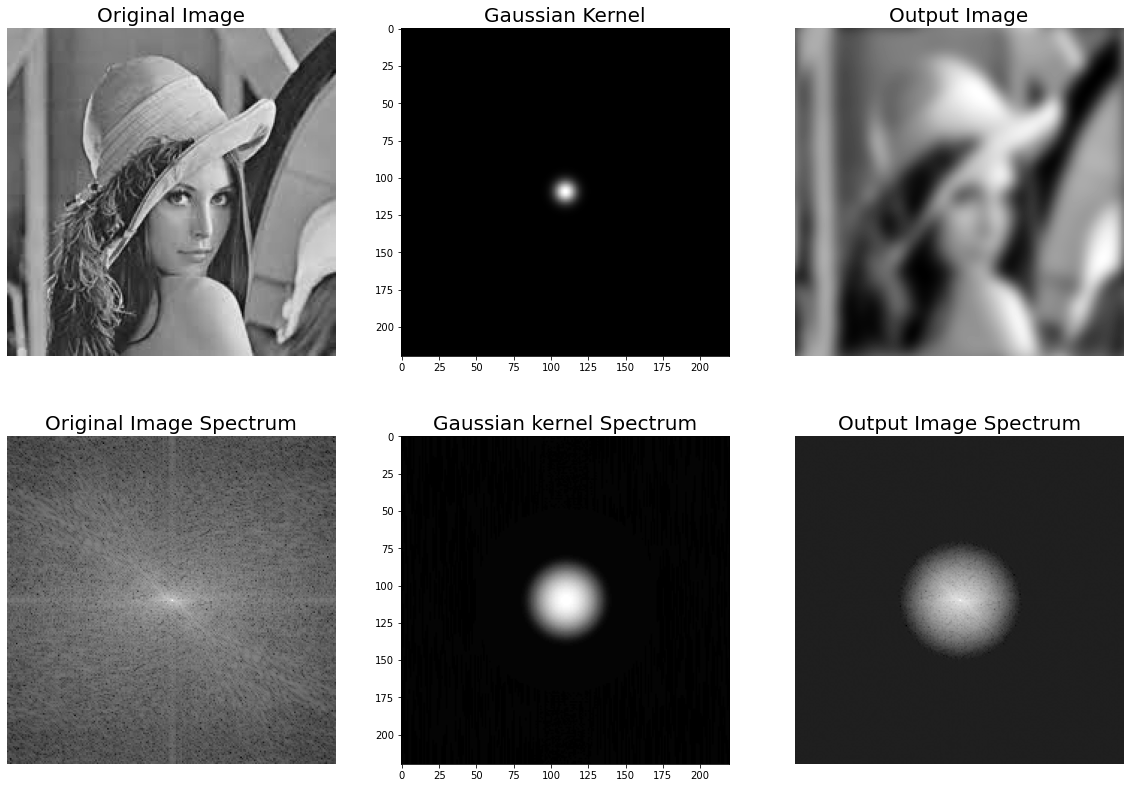

In [6]:
pylab.figure(figsize=(20 ,15))
pylab.gray()
im = np.mean(imread("images/lena.jpg"), axis=2)
gauss_kernel = np.outer(signal.gaussian(im.shape[0], 5), signal.gaussian(im.shape[1], 5))
freq = fp.fft2(im)
assert(freq.shape == gauss_kernel.shape)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
convolved = freq*freq_kernel
im1 = fp.ifft2(convolved).real
pylab.subplot(2, 3, 1)
pylab.imshow(im)
pylab.title('Original Image', size=20)
pylab.axis('off')

pylab.subplot(2, 3, 2)
pylab.imshow(gauss_kernel)
pylab.title('Gaussian Kernel', size=20)

pylab.subplot(2, 3, 3)
pylab.imshow(im1)
pylab.title('Output Image', size=20)
pylab.axis('off')

pylab.subplot(2, 3, 4)
pylab.imshow((20*np.log10(0.1+fp.fftshift(freq))).astype(int))
pylab.title('Original Image Spectrum', size=20)
pylab.axis('off')

pylab.subplot(2, 3, 5)
pylab.imshow((20*np.log10(0.1+fp.fftshift(freq_kernel))).astype(int))
pylab.title('Gaussian kernel Spectrum', size=20)

pylab.subplot(2, 3, 6)
pylab.imshow((20*np.log10(0.1 + fp.fftshift(convolved))).astype(int))
pylab.title('Output Image Spectrum', size=20)
pylab.axis('off')

pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()

<function matplotlib.pyplot.show(close=None, block=None)>

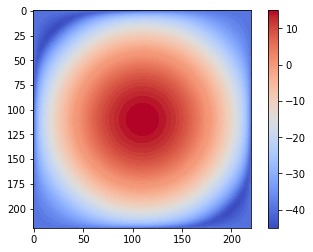

In [9]:
im = rgb2gray(imread('images/lena.jpg'))
gauss_kernel = np.outer(signal.gaussian(im.shape[0], 1), signal.gaussian(im.shape[1], 1))
freq = fp.fft2(im)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
pylab.imshow((20*np.log10(0.01+fp.fftshift(freq_kernel))).real.astype(int), cmap='coolwarm')
pylab.colorbar()
pylab.show
                    

In [10]:
im = np.mean(imread('images/mandrill.jpg'), axis=2)
print(im.shape)

(224, 225)


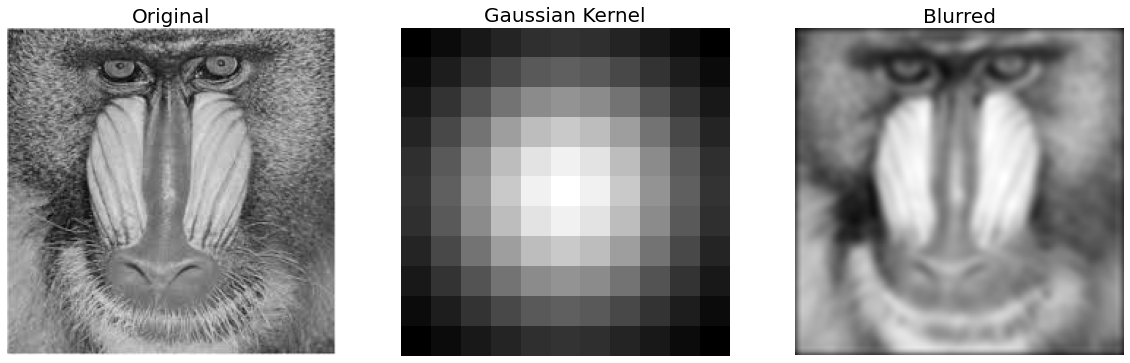

In [12]:
gauss_kernel = np.outer(signal.gaussian(11 ,3), signal.gaussian(11, 3))
im_blurred = signal.fftconvolve(im, gauss_kernel, mode='same')
fig, (ax_original , ax_kernel, ax_blurred) = pylab.subplots(1, 3, figsize=(20, 8))
ax_original.imshow(im, cmap='gray')
ax_original.set_title('Original', size=20)
ax_original.set_axis_off()

ax_kernel.imshow(gauss_kernel)
ax_kernel.set_title('Gaussian Kernel', size=20)
ax_kernel.set_axis_off()

ax_blurred.imshow(im_blurred, cmap='gray')
ax_blurred.set_title('Blurred', size=20)
ax_blurred.set_axis_off()

fig.show()

<ipython-input-14-6ed6cd268279>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow((20*np.log10(0.1+F2)).astype(int), cmap='gray')
<ipython-input-14-6ed6cd268279>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow((20*np.log10(0.1+F2)).astype(int), cmap='gray')


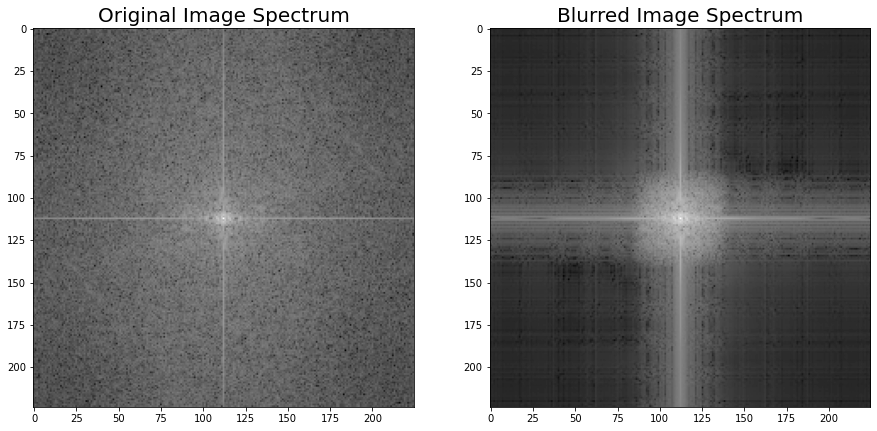

In [14]:
F1 = fp.fft2((im).astype(float))
F2 = fp.fftshift(F1)
pylab.figure(figsize=(15, 8))
pylab.subplot(1, 2, 1)
pylab.imshow((20*np.log10(0.1+F2)).astype(int), cmap='gray')
pylab.title('Original Image Spectrum', size=20)
F1 = fp.fft2((im_blurred).astype(float))
F2 = fp.fftshift(F1)
pylab.subplot(1, 2, 2)
pylab.imshow((20*np.log10(0.1+F2)).astype(int), cmap='gray')
pylab.title('Blurred Image Spectrum', size=20)
pylab.show()